<a href="https://colab.research.google.com/github/MartaKow/statistical-pairwise-comparison-test/blob/main/A_B_test_por%C3%B3wna%C5%84_parami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import glob
import os
import json
from IPython.display import display as d

import pandas as pd
import numpy as np

Wczytanie pliku z wynikami testu porównań parami A/B:

In [ ]:
df = pd.read_excel("WynikiABzdjecia.xlsx")

d(df.head(15))
#d(df)

,osoba,para,obiekt_A,obiekt_B
0,1,1,0.5,0.5
1,1,2,1.0,0.0
2,1,3,1.0,0.0
3,1,4,0.5,0.5
4,1,5,1.0,0.0
5,1,6,0.5,0.5
6,1,7,1.0,0.0
7,1,8,0.5,0.5
8,1,9,1.0,0.0
9,1,10,0.5,0.5


**Określenie stabilności wskazań każdego eksperta** - parametr z1:

Wartość krytyczną z=2 wzięto z [tablicy](http://math.uwb.edu.pl/~elam/TABLICE.pdf)

In [ ]:
u = 86 #uczestnicy
odrzucone = [] #lista osób do odrzucenia z dalszej analizy
parametr_z1 = [] #wartości parametru z1 dla każdej osoby biorącej udział w teście

for i in range(u):
 liczba_glosow_stablinosc = df.loc[df['osoba'] == i+1]
 #d(liczba_glosow_stablinosc)
 z = 0
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para']== 1]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 10]['obiekt_A'].values[0]:
   z = z+1
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 2]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 12]['obiekt_A'].values[0]: 
   z = z+1
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 3]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 9]['obiekt_A'].values[0]:
   z = z+1
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 4]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 11]['obiekt_A'].values[0]: 
   z = z+1 
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 5]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 7]['obiekt_A'].values[0]:
   z = z+1
 if liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 6]['obiekt_A'].values[0] != liczba_glosow_stablinosc.loc[liczba_glosow_stablinosc['para'] == 8]['obiekt_A'].values[0]: 
   z = z+1
 #print("Osoba nr", i+1, "wartość parametru z1:", z)
 parametr_z1.append(z)
 if z>2:
   odrzucone.append(i+1)

# print(odrzucone)
print("Z grupy uczestników liczącej", u, "osób nieistotnych odpowiedzi udzieliły", len(odrzucone), "osoby")

parametryz1 = pd.DataFrame(list(zip(df['osoba'].unique(), parametr_z1)), columns = ["Osoby", "z1"])
d(parametryz1.head(10))


Z grupy uczestników liczącej 86 osób nieistotnych odpowiedzi udzieliły 27 osoby


,Osoby,z1
0,1,1
1,2,1
2,3,1
3,4,0
4,5,5
5,6,3
6,7,4
7,8,1
8,9,1
9,10,0


Usunięcie z dalszej analizy osób, których odpowiedzi nie są istotne statystycznie:

In [ ]:
df2 = df[df.osoba.isin(odrzucone) == False]
d(df2.head())

,osoba,para,obiekt_A,obiekt_B
0,1,1,0.5,0.5
1,1,2,1.0,0.0
2,1,3,1.0,0.0
3,1,4,0.5,0.5
4,1,5,1.0,0.0


Podział danych na dwie serie:

In [ ]:
dfseria1 = df2[df2.para < 7 ]
dfseria2 = df2[df2.para > 6 ]

 Zsumowanie liczby głosów oddanych przez poszczególne osoby oceniające na każdy z obiektów osobno dla serii 1 i serii 2 oraz łączna suma:

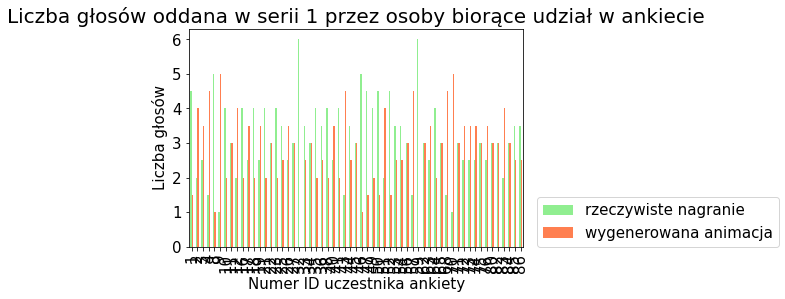

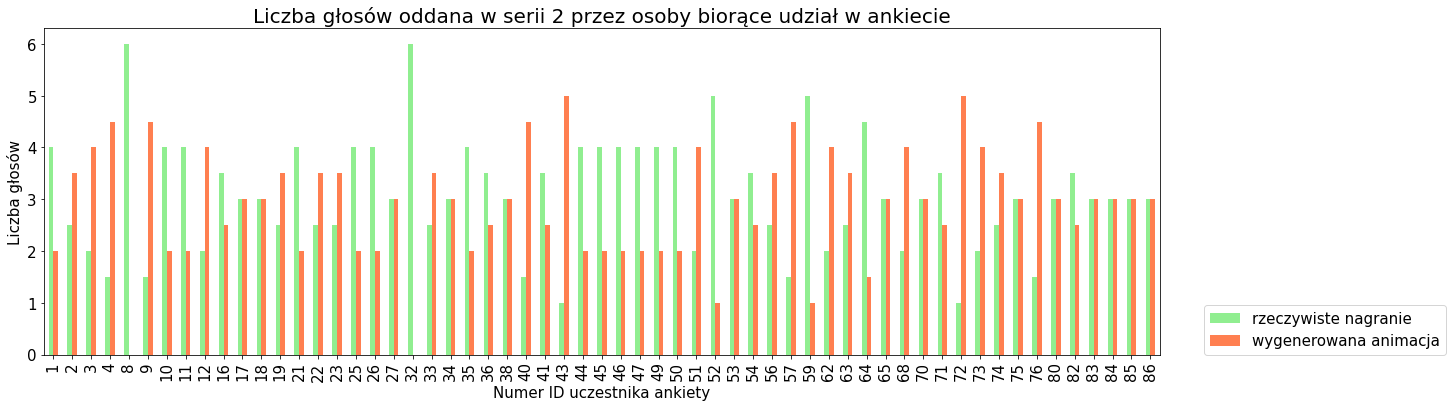

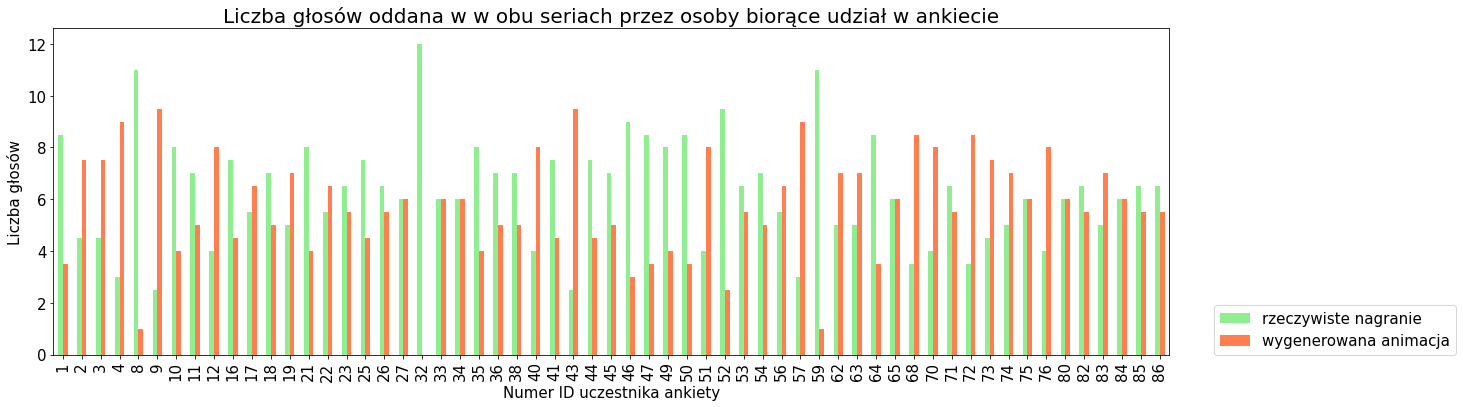

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["font.size"]=15

#dla serii 1:

liczba_glosow_seria1 = dfseria1.groupby(by="osoba").sum().reset_index()[["osoba", "obiekt_A", "obiekt_B"]]
liczba_glosow_seria1 = liczba_glosow_seria1.rename(columns={"obiekt_A": "suma_glosow_A", "obiekt_B": "suma_glosow_B"})

#d(liczba_glosow_seria1.head())

liczba_glosow_seria1.plot(x="osoba", y={"suma_glosow_A","suma_glosow_B"}, kind="bar", color=['lightgreen', 'coral']) #stacked=True legend=False
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Liczba głosów oddana w serii 1 przez osoby biorące udział w ankiecie", fontsize=20)
plt.ylabel("Liczba głosów")
plt.xlabel("Numer ID uczestnika ankiety")
# plt.savefig('seria1.png')
plt.legend(['rzeczywiste nagranie', 'wygenerowana animacja'], loc=((1.04, 0)));

#dla serii 2:

liczba_glosow_seria2 = dfseria2.groupby(by="osoba").sum().reset_index()[["osoba", "obiekt_A", "obiekt_B"]]
liczba_glosow_seria2 = liczba_glosow_seria2.rename(columns={"obiekt_A": "suma_glosow_A", "obiekt_B": "suma_glosow_B"})

liczba_glosow_seria2.plot(x="osoba", y={"suma_glosow_A","suma_glosow_B"}, kind="bar", color=['lightgreen', 'coral']) #stacked=True
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Liczba głosów oddana w serii 2 przez osoby biorące udział w ankiecie", fontsize=20)
plt.ylabel("Liczba głosów")
plt.xlabel("Numer ID uczestnika ankiety")
plt.legend(['rzeczywiste nagranie', 'wygenerowana animacja'], loc=((1.04, 0)));
# plt.savefig('seria2.png')

#dla obu serii łącznie:

liczba_glosow_razem = df2.groupby(by="osoba").sum().reset_index()[["osoba", "obiekt_A", "obiekt_B"]]
liczba_glosow_razem = liczba_glosow_razem.rename(columns={"obiekt_A": "suma_glosow_A", "obiekt_B": "suma_glosow_B"})

liczba_glosow_razem.plot(x="osoba", y={"suma_glosow_A","suma_glosow_B"}, kind="bar", color=['lightgreen', 'coral']) #stacked=True
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Liczba głosów oddana w w obu seriach przez osoby biorące udział w ankiecie", fontsize=20)
plt.ylabel("Liczba głosów")
plt.xlabel("Numer ID uczestnika ankiety")
plt.legend(['rzeczywiste nagranie', 'wygenerowana animacja'], loc=((1.04, 0)));
# plt.savefig('lacznie.png')

Wykreślenie wykresów różnicowych:

In [ ]:
df_to_plot1['a_to_b'] = ((df_to_plot1['suma_glosow_A'] - df_to_plot1['suma_glosow_B']))
df_to_plot1 = df_to_plot1.sort_values(by = ['a_to_b'], ascending=False)
df_to_plot1.plot.bar(x = 'osoba', y = 'a_to_b')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, len(df_to_plot1.osoba))
y = df_to_plot1['a_to_b'].to_numpy()
x_ticks_labels = df_to_plot1['osoba'].to_numpy()

plt.style.use('ggplot')
fig, ax = plt.subplots(1,1) 
ax.stem(x,y)
plt.xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
plt.title("Posegregowana różnica ocen pomiędzy głosami na zdjęcia prawdziwe i wygenerowane dla serii pierwszej")
ax.set_ylabel('różnica ocen pomiędzy głosami na zdjęcia prawdziwe i wygenerowane')
ax.set_xlabel('id uczestnika badania')
plt.show()

In [ ]:
df_to_plot2['a_to_b'] = ((df_to_plot2['suma_glosow_A'] - df_to_plot2['suma_glosow_B']))
sorter = df_to_plot1['osoba'].to_list()
df_to_plot2.osoba = df_to_plot2.osoba.astype("category")
df_to_plot2.osoba = df_to_plot2.osoba.cat.set_categories(sorter)
df_to_plot2 = df_to_plot2.sort_values(by = ['osoba'], ascending=[sorter])

x = np.arange(0, len(df_to_plot2.osoba))
y = df_to_plot2['a_to_b'].to_numpy()
x_ticks_labels = df_to_plot2['osoba'].to_numpy()

plt.style.use('ggplot')
fig, ax = plt.subplots(1,1) 
ax.stem(x,y)
plt.xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)
plt.title("Różnice preferencji uczestników badania dla serii drugiej posegregowane wg. serii pierwszej")
ax.set_ylabel('różnica ocen pomiędzy głosami na zdjęcia prawdziwe i wygenerowane')
ax.set_xlabel('id uczestnika badania')
plt.show()
plt.savefig('AB_seria2.png')

Wyznaczenie sumy głosów oddanych na każdy obiekt przez
wszystkich ankietujących (osobno dla serii 1, 2 oraz łączna):

188.0 166.0
183.0 171.0


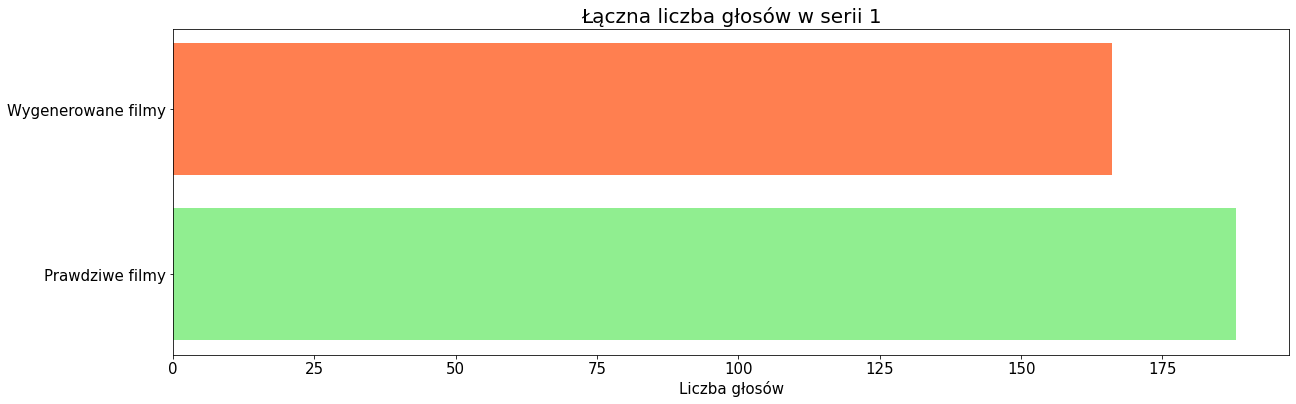

In [ ]:
#seria 1

wszystkie_glosy_seria1 = dfseria1.sum()

plt.barh(["Prawdziwe filmy", "Wygenerowane filmy"], [wszystkie_glosy_seria1.obiekt_A, wszystkie_glosy_seria1.obiekt_B], align='center', color=['lightgreen', 'coral'])
plt.title("Łączna liczba głosów w serii 1", fontsize=20)
plt.xlabel("Liczba głosów")
plt.rcParams["figure.figsize"] = (10,2)

#seria 2

wszystkie_glosy_seria2 = dfseria2.sum()

# plt.barh(["Prawdziwe filmy", "Wygenerowane filmy"], [wszystkie_glosy_seria2.obiekt_A, wszystkie_glosy_seria2.obiekt_B], align='center', color=['lightgreen', 'coral'])
# plt.title("Łączna liczba głosów w serii 2", fontsize=20)
# plt.xlabel("Liczba głosów")
# plt.rcParams["figure.figsize"] = (10,2)

#łącznie dla obu serii

wszystkie_glosy = df2.sum()
#d(wszystkie_glosy[{"obiekt_A", "obiekt_B"}])
#print(wszystkie_glosy.obiekt_B)

# plt.barh(["Prawdziwe filmy", "Wygenerowane filmy"], [wszystkie_glosy.obiekt_A, wszystkie_glosy.obiekt_B], align='center', color=['lightgreen', 'coral'])
# plt.title("Łączna liczba głosów", fontsize=20)
# plt.xlabel("Liczba głosów")
# plt.rcParams["figure.figsize"] = (10,2)

print(wszystkie_glosy_seria1.obiekt_A, wszystkie_glosy_seria1.obiekt_B)
print(wszystkie_glosy_seria2.obiekt_A, wszystkie_glosy_seria2.obiekt_B)


Wyznaczenie liczby głosów uzyskanych przez obiekt A i B dla każdej pary osobno:

,suma_glosow_A,suma_glosow_B,para
0,23.5,35.5,1
1,32.5,26.5,2
2,40.5,18.5,3
3,41.5,17.5,4
4,21.0,38.0,5
5,29.0,30.0,6


,suma_glosow_A,suma_glosow_B,para
3,26.0,33.0,10
5,32.0,27.0,12
2,39.5,19.5,9
4,38.5,20.5,11
0,21.0,38.0,7
1,26.0,33.0,8


Text(0.5, 0, 'Testowana para')

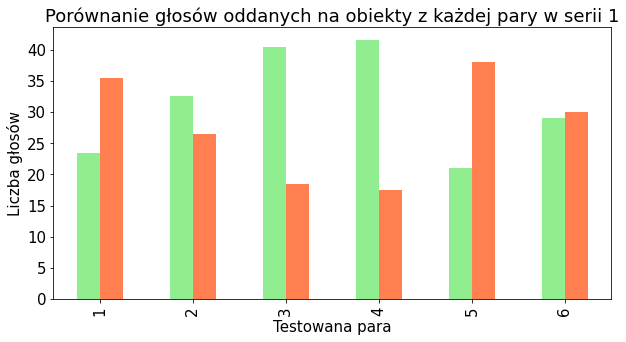

In [ ]:
liczba_glosow_seria1 = dfseria1.groupby(by="para").sum().reset_index()[["obiekt_A", "obiekt_B", "para"]]
liczba_glosow_seria1 = liczba_glosow_seria1.rename(columns={"obiekt_A": "suma_glosow_A", "obiekt_B": "suma_glosow_B"})
d(liczba_glosow_seria1)

liczba_glosow_seria2 = dfseria2.groupby(by="para").sum().reset_index()[["obiekt_A", "obiekt_B", "para"]]
liczba_glosow_seria2 = liczba_glosow_seria2.rename(columns={"obiekt_A": "suma_glosow_A", "obiekt_B": "suma_glosow_B"})
liczba_glosow_seria2 = liczba_glosow_seria2.reindex([3, 5, 2, 4, 0, 1])
d(liczba_glosow_seria2)

liczba_glosow_seria1.plot(x="para", y={"suma_glosow_A","suma_glosow_B"}, kind="bar", color=['lightgreen', 'coral'], legend=False) #stacked=True
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Porównanie głosów oddanych na obiekty z każdej pary w serii 1")
plt.ylabel("Liczba głosów")
plt.xlabel("Testowana para")
# plt.legend(['wygenerowana animacja', 'rzeczywiste nagranie'], loc=((1.04, 0)));

# liczba_glosow_seria2.plot(x="para", y={"suma_glosow_A","suma_glosow_B"}, kind="bar", color=['lightgreen', 'coral'], legend=False) #stacked=True
# plt.rcParams["figure.figsize"] = (10,5)
# plt.title("Porównanie głosów oddanych na obiekty z każdej pary w serii 2")
# plt.ylabel("Liczba głosów")
# plt.xlabel("Testowana para")
# plt.legend(['rzeczywiste zdjęcie', 'wygenerowane zdjęcie'], loc=((1.04, 0)));




Wyznaczenie statystyki chi-kwadrat w celu porównania wyników dla obu części testu; stwierdzenie czy istnieje istotna różnica między głosami oddanymi w obu częścach testu:

In [ ]:
s = 2 #liczba obiektów badanych
r = 2 #liczba części testu
uczestnicy = u - len(odrzucone) #liczba uczestników po odrzuceniu ocen nieistotnych statystycznie
ni = uczestnicy * 6 #liczba obserwacji należących do i-tej części testu (w tym przypadku 6 porównywanych par)
n = r*ni #ogólna liczba obserwacji

suma = 0

#dla 1 serii
suma = suma + ((wszystkie_glosy_seria1.obiekt_A - ((ni*wszystkie_glosy.obiekt_A)/n))**2)/(ni*wszystkie_glosy.obiekt_A) + ((wszystkie_glosy_seria1.obiekt_B - ((ni*wszystkie_glosy.obiekt_B)/n))**2)/(ni*wszystkie_glosy.obiekt_B)

#dla 2 serii
suma = suma + ((wszystkie_glosy_seria2.obiekt_A - ((ni*wszystkie_glosy.obiekt_A)/n))**2)/(ni*wszystkie_glosy.obiekt_A) + ((wszystkie_glosy_seria2.obiekt_B - ((ni*wszystkie_glosy.obiekt_B)/n))**2)/(ni*wszystkie_glosy.obiekt_B)

chi_kwadrat = n * suma
print("chi_kwadrat =", chi_kwadrat)

chi_kwadrat = 0.1415694210050629


Wyznaczenie stopni swobody:

In [ ]:
l = (r-1)*(s-1)
print("liczba stopni swobody l =", l)

liczba stopni swobody l = 1


Wartość krytyczna odczytana z [tablic](http://prac.im.pwr.wroc.pl/~arokita/SMG/Tablica%20rozkladu%20chi%20kwadrat.pdf) dla poziomu istotności a = 0.05 i l stopni swobody = 1 wynosi **3,8415**

Jeżeli obliczona wartość chi_kwadrat jest wyższa należy odrzucić hipotezę statystycznej zgodności porównywanych wyników obu części testu.



---


Określenie parametru **z2** -> uczestnicy, którzy daną parę interpretują odmiennie w zależności od części testu

W teście wykorzystano 6 scen: Patryk, Ola, Michał, Agata, Czarek, Asia
Każda scena użyta dla dwóch warunków: p - prawdziwe nagranie, f - wygenerowana animacja

Kolejne pary obejmują następujące porównania:

1. Patryk p vs Ola f
2. Agata f vs Michał p
3. Asia f vs Czarek p
4. Asia p vs Patryk f
5. Ola p vs Michał f
6. Czarek f vs Agata p
7. Michał f vs Ola p
8. Agata p vs Czarek f
9. Asia f vs Czarek p
10. Ola f vs Patryk p
11. Asia p vs Patryk f
12. Michał p vs Agata f

Pierwsza część testu obejmuje 6 pierwszych par, druga część zawiera te same porównania, ale w losowej kolejności. Pokrywające się pary to:

*   para 1 = para 10
*   para 2 = para 12
*   para 3 = para 9
*   para 4 = para 11
*   para 5 = para 7
*   para 6 = para 8



In [ ]:
pd.options.mode.chained_assignment = None
IDuczestnikow = df2['osoba'].unique().tolist()
#print(IDuczestnikow)

#zmaina ID uczestnika w zależności od występowania:
i=1
for item in IDuczestnikow:
  df2["osoba"].replace({item : i}, inplace = True)
  i = i+1 

#d(df2.head(25))



In [ ]:
z2_paraA = 0
z2_paraB = 0
z2_paraC = 0
z2_paraD = 0
z2_paraE = 0
z2_paraF = 0

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 1)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 10)]['obiekt_A'].values[0]:
    z2_paraA += 1

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 2)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 12)]['obiekt_A'].values[0]:
    z2_paraB += 1

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 3)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 9)]['obiekt_A'].values[0]:
    z2_paraC += 1

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 4)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 11)]['obiekt_A'].values[0]:
    z2_paraD += 1

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 5)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 7)]['obiekt_A'].values[0]:
    z2_paraE += 1

for i in range (len(IDuczestnikow)):
  if df2.loc[(df2['osoba']== i+1) & (df['para'] == 6)]['obiekt_A'].values[0] != df2.loc[(df2['osoba']== i+1) & (df['para'] == 8)]['obiekt_A'].values[0]:
    z2_paraF += 1

#print (z2_paraA)

from tabulate import tabulate
  
# creating a DataFrame
dict = {'Para':['1', '2', '3', '4', '5', '6'],
        'z2':[z2_paraA, z2_paraB, z2_paraC, z2_paraD, z2_paraE, z2_paraF]}
parametryz = pd.DataFrame(dict)
  
# displaying the DataFrame
print(tabulate(parametryz, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════╤══════╕
│    │   Para │   z2 │
╞════╪════════╪══════╡
│  0 │      1 │   13 │
├────┼────────┼──────┤
│  1 │      2 │   16 │
├────┼────────┼──────┤
│  2 │      3 │   10 │
├────┼────────┼──────┤
│  3 │      4 │   12 │
├────┼────────┼──────┤
│  4 │      5 │   11 │
├────┼────────┼──────┤
│  5 │      6 │    4 │
╘════╧════════╧══════╛


Obliczanie parametru **z3**

Wartość krytyczna z(a) = 1,96 dla a = 0,05

Jeżeli obliczony parametr z3 < z(a) to nie ma podstaw do odrzucenia hipotezy o braku istotnej różnicy między porównywanymi obiektami

**zAB_seria1** -> Istotność różnic między obrazami rzeczywistymi A a obrazami wygenerowanymi B przy założeniu istotności a=0,05 biorąc pod uwagę tylko 1 serię testu:

In [ ]:
import math

N = 6 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt
pA = wszystkie_glosy_seria1.obiekt_A/N #względna liczebność głosów opowiadających się za obiektem A
pB = wszystkie_glosy_seria1.obiekt_B/N

zAB = (abs(pA-pB))/math.sqrt(((pA+pB)*(2-pA-pB))/(2*N))
print(zAB)

1.6536212616062231


**zAB_seria2** -> Istotność różnic między obrazami rzeczywistymi A a obrazami wygenerowanymi B przy założeniu istotności a=0,05 biorąc pod uwagę tylko 2 serię testu:

In [ ]:
N = 6 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt
pA = wszystkie_glosy_seria2.obiekt_A/N #względna liczebność głosów opowiadających się za obiektem A
pB = wszystkie_glosy_seria2.obiekt_B/N

zAB_seria2 = (abs(pA-pB))/math.sqrt(((pA+pB)*(2-pA-pB))/(2*N))
print(zAB_seria2)

0.9019752336033938


**zAB_łączna** -> dla obu serii

In [ ]:
N = 12 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt
pA = wszystkie_glosy.obiekt_A/N #względna liczebność głosów opowiadających się za obiektem A
pB = wszystkie_glosy.obiekt_B/N

zAB_razem = (abs(pA-pB))/math.sqrt(((pA+pB)*(2-pA-pB))/(2*N))
print(zAB_razem)

1.8070796117392933


Statystyka chi_kwadrat policzona zgodnie z tym co na [stronie](http://statystyka-pomoc.com/Chi-kwadrat.html)

Jeżeli większa niż 3,841 to odrzucamy hipotezę zerową, że nie ma różnic między wygenerowanymi a rzeczywistymi obrazami

In [ ]:
#policzone dla 1 części testu:

N = 6 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt

chi_kwadrat_nowe = 2 * (((wszystkie_glosy_seria1.obiekt_A - N/2)**2)/(N/2))
print("chi kwadrat: ", chi_kwadrat_nowe)

chi kwadrat:  1.3672316384180792


In [ ]:
#policzone dla 2 części testu:

N = 6 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt

chi_kwadrat_nowe = 2 * (((wszystkie_glosy_seria2.obiekt_A - N/2)**2)/(N/2))
print("chi kwadrat: ", chi_kwadrat_nowe)

chi kwadrat:  0.4067796610169492


In [ ]:
#policzone dla obu części testu łącznie:

N = 12 * uczestnicy #maks. liczba głosów możliwa do uzyskania przez jeden obiekt

chi_kwadrat_nowe = 2 * (((wszystkie_glosy.obiekt_A - N/2)**2)/(N/2))
print("chi kwadrat: ", chi_kwadrat_nowe)

chi kwadrat:  89.18537414965986
